In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

In [2]:
os.chdir("C:\\Users\\50011443\\Downloads\\Mobility analytics")

In [3]:
train=pd.read_csv("train_Wc8LBpr.csv")

In [4]:
test=pd.read_csv("test_VsU9xXK.csv")

In [5]:
train.head(2)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.905,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.450,0,38.0,56,78,Male,2


In [6]:
test.head(2)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female


In [7]:
train.shape

(131662, 14)

In [8]:
test.shape

(87395, 13)

In [9]:
train.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [10]:
test.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
dtype: object

In [11]:
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [12]:
test.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
count,87395.000000,83429.000000,74068.000000,87395.000000,87395.000000,40606.000000,87395.000000,87395.000000
mean,44.095174,5.990051,2.803392,2.847389,0.783031,63.936610,51.162160,75.015699
std,25.483993,3.626861,0.227113,0.981744,1.034266,21.636247,4.956831,11.582761
min,1.550000,0.000000,1.317850,0.001250,0.000000,30.000000,41.000000,52.000000
25%,24.540000,3.000000,2.654518,2.152500,0.000000,45.000000,48.000000,67.000000
50%,38.060000,6.000000,2.798630,2.895000,0.000000,61.000000,50.000000,73.000000
75%,60.690000,10.000000,2.949053,3.580000,1.000000,79.000000,54.000000,82.000000
max,109.230000,10.000000,4.871920,5.000000,8.000000,178.000000,116.000000,169.000000


In [13]:
train.Surge_Pricing_Type.value_counts()/len(train)  #non of the catogory is unbalanced

2    0.430861
3    0.362443
1    0.206696
Name: Surge_Pricing_Type, dtype: float64

In [14]:
train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [15]:
test.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [16]:
train.head(1)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.905,0,40.0,46,60,Female,2


In [17]:
corr=train.corr()

In [18]:
corr

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_Distance,1.000000,0.116812,0.509482,-0.054654,-0.007686,-0.045468,0.200456,0.231706,0.135928
Customer_Since_Months,0.116812,1.000000,0.135114,-0.050349,-0.006325,-0.009856,0.042637,0.113403,0.027827
Life_Style_Index,0.509482,0.135114,1.000000,0.205824,0.074023,-0.091307,0.234754,0.329312,-0.080108
Customer_Rating,-0.054654,-0.050349,0.205824,1.000000,0.003595,-0.010968,-0.302968,-0.227531,-0.155279
Cancellation_Last_1Month,-0.007686,-0.006325,0.074023,0.003595,1.000000,0.010953,0.095830,0.128686,0.185646
Var1,-0.045468,-0.009856,-0.091307,-0.010968,0.010953,1.000000,-0.046755,-0.061993,-0.040735
Var2,0.200456,0.042637,0.234754,-0.302968,0.095830,-0.046755,1.000000,0.683437,0.003437
Var3,0.231706,0.113403,0.329312,-0.227531,0.128686,-0.061993,0.683437,1.000000,-0.039309
Surge_Pricing_Type,0.135928,0.027827,-0.080108,-0.155279,0.185646,-0.040735,0.003437,-0.039309,1.000000


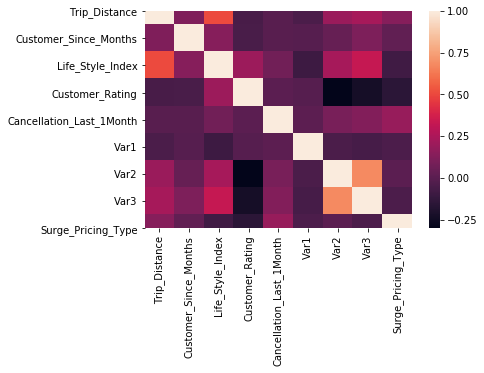

In [19]:
sns.heatmap(corr)

var 2 and var 3 has good amount of correlation so we cna either ignore one variable from the analysis 
Life Style Index and Trip Distance has also some correlation amoong them 

# Starting with Basic EDA 

In [20]:
train.head(1)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.905,0,40.0,46,60,Female,2


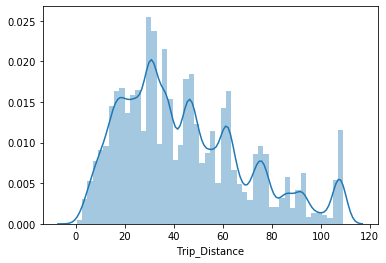

In [21]:
sns.distplot(train['Trip_Distance'])

Here we can see that most of the customers have taken a distance between twenty to eighty kms 

In [22]:
train.Type_of_Cab.value_counts()

B    31136
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64

In [23]:
train['Type_of_Cab'].fillna("B",inplace=True)

In [24]:
test['Type_of_Cab'].fillna("B",inplace=True)

In [25]:
train['Customer_Since_Months'].fillna(-999,inplace=True)

In [26]:
test['Customer_Since_Months'].fillna(-999,inplace=True)

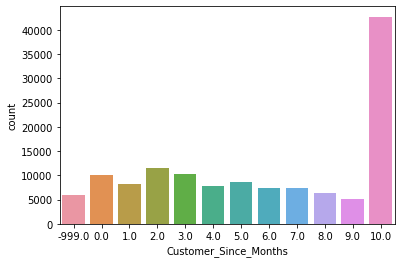

In [27]:
sns.countplot(train.Customer_Since_Months)

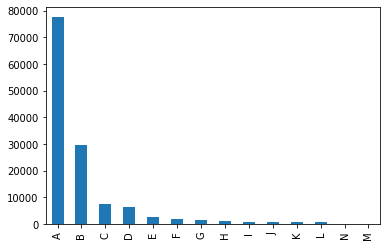

In [28]:
train.Destination_Type.value_counts().plot(kind='bar')

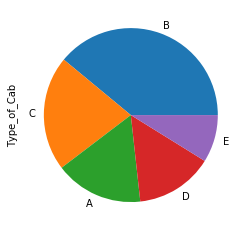

In [29]:
train.Type_of_Cab.value_counts().plot(kind='pie')

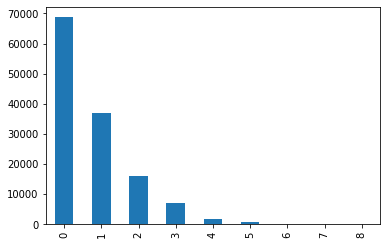

In [30]:
train.Cancellation_Last_1Month.value_counts().plot(kind='bar')

In [31]:
train.Gender.value_counts()/len(train)

Male      0.71319
Female    0.28681
Name: Gender, dtype: float64

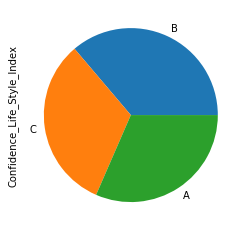

In [32]:
train.Confidence_Life_Style_Index.value_counts().plot(kind='pie')

In [33]:
train.groupby('Surge_Pricing_Type')['Trip_Distance'].sum()

Surge_Pricing_Type
1    1117451.29
2    2341122.85
3    2361005.88
Name: Trip_Distance, dtype: float64

As of now we have understood that ,Majority of the customers are male(70%) although female & they are taking Cab type B ,which we assume is more affordable and going to destination A which can be office premises we can assume ,The cab services are punctual since we see majority in zero cancellation last month (They are punctual in Time) ,and these customers have been using the cab service since long time(majority have been associated with more than 10 month).From the distance graph we can see these services are taken for short distances not for outstation services.Also we observe majority  of the customers have an average life style.
So ,these cab services are for sure not for leisure they are for daily use purposes or for general usage.

Surge Pricing 
T 1 can be of H  price 
T 2 can be of M surge price
T 3 can be of S surge price based on trip distance.

In [34]:
train.head(2)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.905,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.450,0,38.0,56,78,Male,2


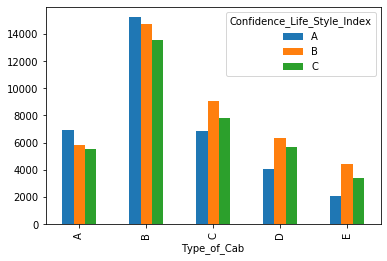

In [35]:
pd.crosstab(train['Type_of_Cab'],train['Confidence_Life_Style_Index']).plot(kind='bar',stacked=False,grid=False)

Poeple having Good life style that is A and B are only taking cabs A and B others are following the cabs C D E 

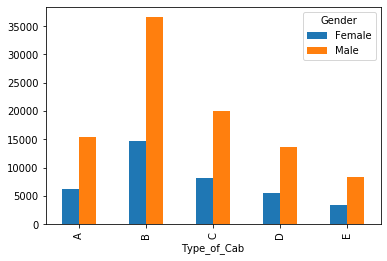

In [36]:
pd.crosstab(train['Type_of_Cab'],train['Gender']).plot(kind='bar',stacked=False,grid=False)

Female proportion is more particular regarding the type of cab ,they prefer having cab B more than any of the type.

In [37]:
pd.crosstab(train['Confidence_Life_Style_Index'],train['Destination_Type'])

Destination_Type,A,B,C,D,E,F,G,H,I,J,K,L,M,N
Confidence_Life_Style_Index,,,,,,,,,,,,,,
A,19407,8379,1953,2145,952,283,584,421,305,251,238,147,21,61
B,24584,8565,2430,1783,694,853,307,326,176,168,205,224,23,17
C,21621,8113,1981,1673,649,508,368,308,210,161,144,188,33,10


These cabs are only used by customers having average life style index ,we can see these are not much used by poeple having life style index A

In [38]:
train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months              0
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [39]:
train['Rating_Bucket']=pd.cut(train['Customer_Rating'],bins=[0,1,2,3,4,5,6],right=False,include_lowest=True)

In [40]:
test['Rating_Bucket']=pd.cut(test['Customer_Rating'],bins=[0.00125,1,2,3,4,5,6],right=False,include_lowest=True)

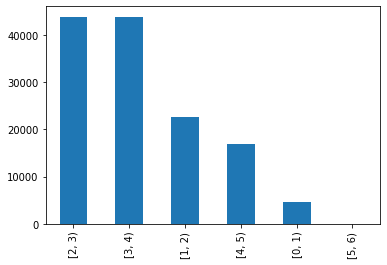

In [41]:
train['Rating_Bucket'].value_counts().plot(kind='bar')

This cab has been rated average by most of the customers,ratings are between 2 and 3 

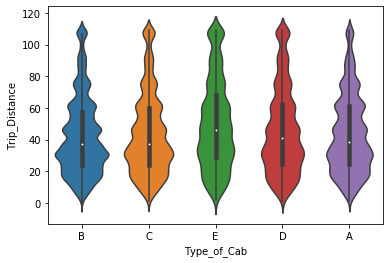

In [42]:
sns.violinplot(x=train['Type_of_Cab'],y=train['Trip_Distance'])

We can see that cab type A and B are used for small distances where as the cab type D and E are more preferably
used for larger distances

In [43]:
# sns.boxplot(x=train['Destination_Type'],y=train['Trip_Distance'])

In [44]:
train.head(3)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type,Rating_Bucket
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2,"[3, 4)"
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2,"[3, 4)"
2,T0005689464,41.58,B,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2,"[3, 4)"


In [45]:
train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                        0
Customer_Since_Months              0
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
Rating_Bucket                      0
dtype: int64

In [46]:
train=train.drop(['Life_Style_Index','Var1','Var2'],axis=1)

In [47]:
test=test.drop(['Life_Style_Index','Var1','Var2'],axis=1)

In [48]:
train['Confidence_Life_Style_Index'].fillna("B",inplace=True)

In [49]:
test['Confidence_Life_Style_Index'].fillna("B",inplace=True)

In [50]:
test.isnull().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var3                           0
Gender                         0
Rating_Bucket                  0
dtype: int64

In [51]:
train['Distance_Bucket']=pd.cut(train['Trip_Distance'],bins=[0,20,40,60,80,100,120],right=False,include_lowest=True)

In [52]:
test['Distance_Bucket']=pd.cut(test['Trip_Distance'],bins=[0,20,40,60,80,100,120],right=False,include_lowest=True)

In [53]:
train['Var_Buc']=pd.cut(train['Trip_Distance'],bins=[0,100,200,300],right=False,include_lowest=True)

In [54]:
test['Var_Buc']=pd.cut(test['Trip_Distance'],bins=[0,100,200,300],right=False,include_lowest=True)

In [55]:
train=train.drop(['Trip_Distance','Customer_Rating','Var3'],axis=1)

In [56]:
test.head(1)

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var3,Gender,Rating_Bucket,Distance_Bucket,Var_Buc
0,T0005689459,9.44,A,10.0,A,B,3.68,2,63,Male,"[3.0, 4.0)","[0, 20)","[0, 100)"


In [57]:
test=test.drop(['Trip_Distance','Customer_Rating','Var3'],axis=1)

In [58]:
train['Customer_Since_Months']=train['Customer_Since_Months'].astype('int')

In [59]:
test['Customer_Since_Months']=test['Customer_Since_Months'].astype('int')

In [60]:
train.dtypes

Trip_ID                          object
Type_of_Cab                      object
Customer_Since_Months             int32
Confidence_Life_Style_Index      object
Destination_Type                 object
Cancellation_Last_1Month          int64
Gender                           object
Surge_Pricing_Type                int64
Rating_Bucket                  category
Distance_Bucket                category
Var_Buc                        category
dtype: object

In [61]:
train['Rating_Bucket']=train['Rating_Bucket'].astype(str)
train['Distance_Bucket']=train['Distance_Bucket'].astype(str)
train['Var_Buc']=train['Var_Buc'].astype(str)


In [62]:
test['Rating_Bucket']=test['Rating_Bucket'].astype(str)
test['Distance_Bucket']=test['Distance_Bucket'].astype(str)
test['Var_Buc']=test['Var_Buc'].astype(str)


In [63]:
train.head(3)

,Trip_ID,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Cancellation_Last_1Month,Gender,Surge_Pricing_Type,Rating_Bucket,Distance_Bucket,Var_Buc
0,T0005689460,B,1,A,A,0,Female,2,"[3, 4)","[0, 20)","[0, 100)"
1,T0005689461,B,10,B,A,0,Male,2,"[3, 4)","[20, 40)","[0, 100)"
2,T0005689464,B,10,B,E,2,Male,2,"[3, 4)","[40, 60)","[0, 100)"


In [64]:
test.head(3)

,Trip_ID,Type_of_Cab,Customer_Since_Months,Confidence_Life_Style_Index,Destination_Type,Cancellation_Last_1Month,Gender,Rating_Bucket,Distance_Bucket,Var_Buc
0,T0005689459,A,10,A,B,2,Male,"[3.0, 4.0)","[0, 20)","[0, 100)"
1,T0005689462,B,10,A,A,0,Female,"[1.0, 2.0)","[20, 40)","[0, 100)"
2,T0005689463,C,4,A,D,0,Male,"[4.0, 5.0)","[0, 20)","[0, 100)"


In [65]:
train=train.drop(['Trip_ID'],axis=1)
train.columns

Index(['Type_of_Cab', 'Customer_Since_Months', 'Confidence_Life_Style_Index',
       'Destination_Type', 'Cancellation_Last_1Month', 'Gender',
       'Surge_Pricing_Type', 'Rating_Bucket', 'Distance_Bucket', 'Var_Buc'],
      dtype='object')

In [66]:
train=pd.get_dummies(train)

In [67]:
Trip_idS = test['Trip_ID']
test = test.drop(['Trip_ID'], axis = 1)
test.columns

Index(['Type_of_Cab', 'Customer_Since_Months', 'Confidence_Life_Style_Index',
       'Destination_Type', 'Cancellation_Last_1Month', 'Gender',
       'Rating_Bucket', 'Distance_Bucket', 'Var_Buc'],
      dtype='object')

In [68]:
test=pd.get_dummies(test)

In [69]:
test.shape

(87395, 40)

In [70]:
x_test=test
x_test.columns

Index(['Customer_Since_Months', 'Cancellation_Last_1Month', 'Type_of_Cab_A',
       'Type_of_Cab_B', 'Type_of_Cab_C', 'Type_of_Cab_D', 'Type_of_Cab_E',
       'Confidence_Life_Style_Index_A', 'Confidence_Life_Style_Index_B',
       'Confidence_Life_Style_Index_C', 'Destination_Type_A',
       'Destination_Type_B', 'Destination_Type_C', 'Destination_Type_D',
       'Destination_Type_E', 'Destination_Type_F', 'Destination_Type_G',
       'Destination_Type_H', 'Destination_Type_I', 'Destination_Type_J',
       'Destination_Type_K', 'Destination_Type_L', 'Destination_Type_M',
       'Destination_Type_N', 'Gender_Female', 'Gender_Male',
       'Rating_Bucket_[0.00125, 1.0)', 'Rating_Bucket_[1.0, 2.0)',
       'Rating_Bucket_[2.0, 3.0)', 'Rating_Bucket_[3.0, 4.0)',
       'Rating_Bucket_[4.0, 5.0)', 'Rating_Bucket_[5.0, 6.0)',
       'Distance_Bucket_[0, 20)', 'Distance_Bucket_[100, 120)',
       'Distance_Bucket_[20, 40)', 'Distance_Bucket_[40, 60)',
       'Distance_Bucket_[60, 80)', 'Dist

In [71]:
# splitting the train set into dependent and independent sets

x=train.drop(['Surge_Pricing_Type'],axis=1) #independent variables

In [72]:
y=train['Surge_Pricing_Type']

In [73]:
print("x shape:",x.shape)
print("y shape",y.shape)

x shape: (131662, 40)
y shape (131662,)


In [74]:
y.value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (105329, 40)
Shape of x_valid:  (26333, 40)
Shape of y_train:  (105329,)
Shape of y_valid:  (26333,)


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [77]:
logis=LogisticRegression()
logis.fit(x_train,y_train)

C:\Users\50011443\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50011443\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
print("Trianing Accuracy",logis.score(x_train,y_train))

Trianing Accuracy 0.6771639339593084


In [79]:
print("Validation Accuracy :", logis.score(x_valid, y_valid))

Validation Accuracy : 0.6763376751604451


In [80]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [81]:
print("Trianing Accuracy",knn.score(x_train,y_train))

Trianing Accuracy 0.6987724178526332


In [82]:
logis_pred = knn.predict(x_test)

In [83]:
a=pd.DataFrame(logis_pred)
b=pd.DataFrame(Trip_idS)
c=b.join(a)

In [84]:
c.columns=['Trip_ID','Surge_Pricing_Type']

In [85]:
c.Surge_Pricing_Type.value_counts()

2    44933
3    26933
1    15529
Name: Surge_Pricing_Type, dtype: int64

In [86]:
c.to_csv("Indranilsubmission.csv",index=False)

In [87]:
rfc=RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_leaf=5,criterion='entropy',verbose=True,n_jobs=-1)

In [88]:
rfc.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    8.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None,
                       verbose=True, warm_start=False)

In [89]:
print(rfc.score(x_train,y_train))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s


0.6822907271501676


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.7s finished


In [90]:
print(rfc.score(x_valid,y_valid))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished


0.6777047810731781


In [91]:
rfc_pred=rfc.predict(x_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.5s finished


In [92]:
a=pd.DataFrame(rfc_pred)
b=pd.DataFrame(Trip_idS)
c=b.join(a)

In [93]:
c.columns=['Trip_ID','Surge_Pricing_Type']

In [94]:
c.Surge_Pricing_Type.value_counts()

2    51526
3    22683
1    13186
Name: Surge_Pricing_Type, dtype: int64

In [95]:
c.to_csv("Indranilsubmission.csv",index=False)